In [ ]:
# pip install pandas opencv-python

import cv2
import pandas as pd

img_path = 'pic2.jpg'
csv_path = 'colors.csv'

# reading csv file
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)

# reading image
img = cv2.imread(img_path)
img = cv2.resize(img, (800,600))

#declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

#function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R,G,B):
	minimum = 1000
	for i in range(len(df)):
		d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
		if d <= minimum:
			minimum = d
			cname = df.loc[i, 'color_name']

	return cname

#function to get x,y coordinates of mouse double click
def draw_function(event, x, y, flags, params):
	if event == cv2.EVENT_LBUTTONDBLCLK:
		global b, g, r, xpos, ypos, clicked
		clicked = True
		xpos = x
		ypos = y
		b,g,r = img[y,x]
		b = int(b)
		g = int(g)
		r = int(r)

# creating window
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

while True:
	cv2.imshow('image', img)
	if clicked:
		#cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle
		cv2.rectangle(img, (20,20), (600,60), (b,g,r), -1)

		#Creating text string to display( Color name and RGB values )
		text = get_color_name(r,g,b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
		#cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
		cv2.putText(img, text, (50,50), 2,0.8, (255,255,255),2,cv2.LINE_AA)

		#For very light colours we will display text in black colour
		if r+g+b >=600:
			cv2.putText(img, text, (50,50), 2,0.8, (0,0,0),2,cv2.LINE_AA)

	if cv2.waitKey(20) & 0xFF == 27:
		break

cv2.destroyAllWindows()


Please upload your image file (e.g., pic2.jpg):


Saving pic1.jpg to pic1.jpg


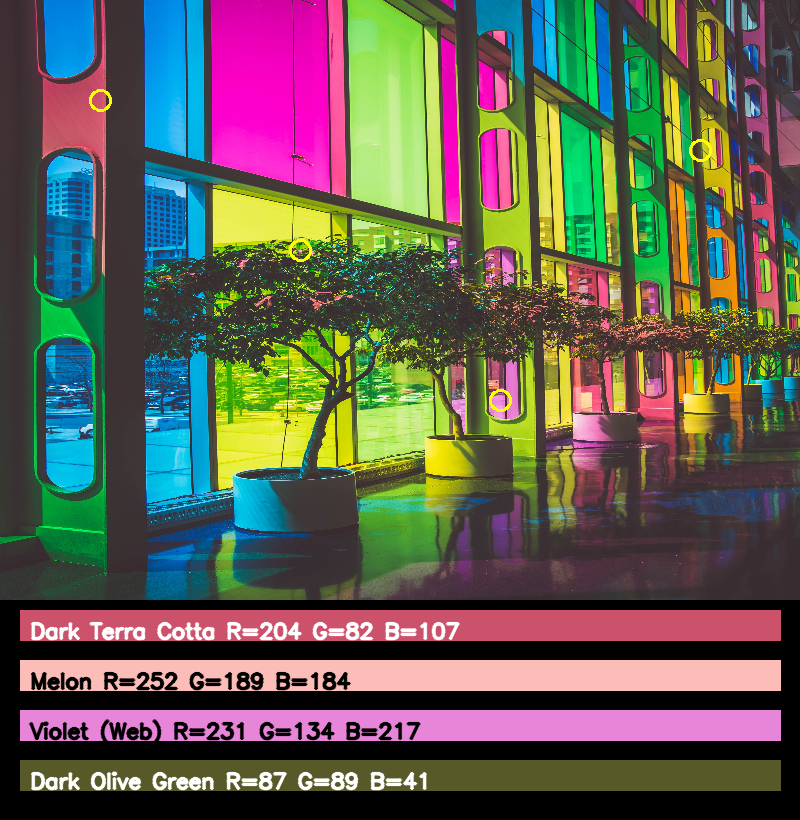

In [1]:
!pip install pandas opencv-python

import cv2
import pandas as pd
from google.colab.patches import cv2_imshow # Import for Colab display
from google.colab import files # Import for file upload

# Define path to CSV file
csv_path = 'colors.csv' # Ensure this CSV exists in your /content/ directory

# Upload image file
print("Please upload your image file (e.g., pic2.jpg):")
uploaded_img = files.upload()

# Get the filename of the uploaded image
if not uploaded_img:
    print("No image file uploaded. Please upload an image to proceed.")
    # Optionally, you could exit or raise an error here.
    exit()

img_path = list(uploaded_img.keys())[0]

# reading csv file
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)

# reading image
img = cv2.imread(img_path)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {img_path}. Please check the file path and ensure it's a valid image.")
else:
    img = cv2.resize(img, (800,600)) # Resize for consistent processing

    # function to calculate minimum distance from all colors and get the most matching color
    def get_color_name(R,G,B):
        minimum = 1000
        cname = 'Unknown'
        for i in range(len(df)):
            d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
            if d <= minimum:
                minimum = d
                cname = df.loc[i, 'color_name']
        return cname

    # --- Non-interactive version for Colab ----
    # Define a list of points to "sample" colors from (x, y coordinates on the 800x600 image)
    # You can modify these points to sample different areas of the image.
    sample_points = [(100, 100), (300, 250), (500, 400), (700, 150)] # Example points

    # Create a new image with added space at the bottom for color info
    height, width, _ = img.shape
    info_bar_height = 50 * len(sample_points) + 20 # 50 pixels per info line + padding
    combined_img = cv2.copyMakeBorder(img, 0, info_bar_height, 0, 0, cv2.BORDER_CONSTANT, value=[0,0,0])

    for idx, (xpos, ypos) in enumerate(sample_points):
        # Ensure xpos, ypos are within image bounds
        if 0 <= ypos < height and 0 <= xpos < width:
            # Get BGR values at the point from the resized image
            b, g, r = img[ypos, xpos]
            b, g, r = int(b), int(g), int(r)

            text = get_color_name(r,g,b) + f' R={r} G={g} B={b}'

            # Determine text color based on detected color brightness
            text_color = (255, 255, 255) # Default to white text
            if (r + g + b) / 3 > 150: # If average brightness is high, use black text
                text_color = (0, 0, 0)

            # Draw a rectangle showing the detected color in the info bar at the bottom
            start_x_rect = 20
            end_x_rect = width - 20
            start_y_rect = height + 10 + idx * 50
            end_y_rect = height + 40 + idx * 50
            cv2.rectangle(combined_img, (start_x_rect, start_y_rect), (end_x_rect, end_y_rect), (b, g, r), -1)

            # Draw the text on the rectangle
            cv2.putText(combined_img, text, (start_x_rect + 10, start_y_rect + 28), # Adjusted y for text centering
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2, cv2.LINE_AA)

            # Draw a circle on the original image portion to mark the sampled point
            cv2.circle(combined_img, (xpos, ypos), 10, (0, 255, 255), 2) # Yellow circle
        else:
            print(f"Warning: Sample point ({xpos}, {ypos}) is out of image bounds (800x600). Skipping.")

    # Display the combined image using Colab's imshow
    cv2_imshow(combined_img)


# Image Color Detection in Google Colab

This Google Colab notebook allows you to detect prominent colors in an image and identify their names. It uses OpenCV for image processing and pandas to manage a dataset of colors.

## How to Use

1.  **Open the Colab Notebook**: Open this `.ipynb` file in Google Colab.
2.  **Upload `colors.csv`**: Ensure you have a `colors.csv` file available in your Colab environment. If not, upload it to your Colab session (`File > Upload`). This file contains a list of color names and their RGB values.
3.  **Run the Code Cell**: Execute the code cell provided in the notebook. This cell will:
    *   Install necessary libraries (`pandas`, `opencv-python`).
    *   **Prompt you to upload an image file**. Select the image you want to analyze (e.g., `pic2.jpg`).
    *   Process the uploaded image.
    *   Sample colors from predefined points on the image.
    *   Display the image with the detected color names and their RGB values annotated at the bottom.

## Requirements

The notebook automatically installs the required libraries:
*   `pandas`
*   `opencv-python`

## Customization

*   You can modify the `sample_points` list in the Python code to choose different locations on the image from where colors will be sampled.
*   You can replace `colors.csv` with your own CSV file containing color definitions, ensuring it has columns named 'color', 'color_name', 'hex', 'R', 'G', 'B'.